In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [3]:
#load dataset
df = pd.read_excel("C:/Users/sharm/Downloads/avocado_prices.xlsx")

In [4]:
#prepare model
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['TimeIndex'] = np.arange(len(df))

X = df[['TimeIndex']]
y = df['AveragePrice']

In [5]:
# Train model
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# Forecast next 10 weeks
future_index = pd.DataFrame(
    np.arange(len(df), len(df)+10), 
    columns=["TimeIndex"]
)

future_prices = model.predict(future_index)

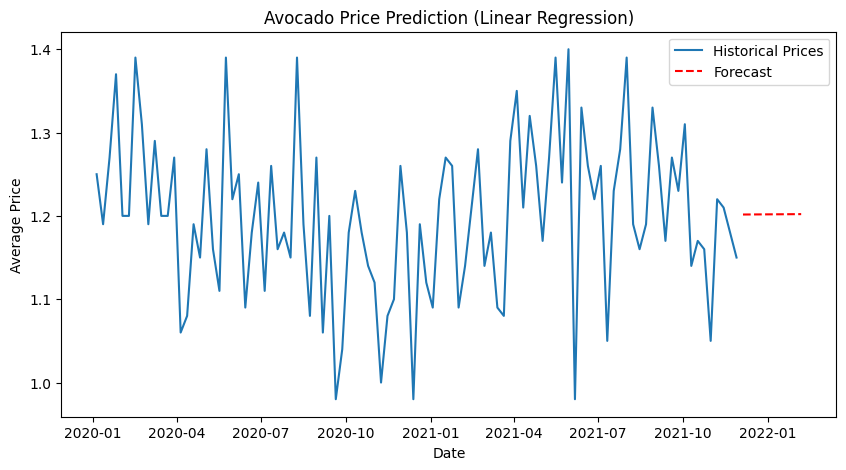

In [8]:
# Plot actual + prediction
plt.figure(figsize=(10,5))
plt.plot(df['Date'], y, label="Historical Prices")
plt.plot(pd.date_range(df['Date'].iloc[-1], periods=11, freq="W")[1:], future_prices, 'r--', label="Forecast")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.title("Avocado Price Prediction (Linear Regression)")
plt.legend()
plt.show()